In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('particulars_of_first_registered_vehicle_nov_2019_eng.csv')

groupeddf = df.groupby(['Fuel Type','Vehicle Make']).count().reset_index()

#sns.lmplot(data=groupeddf,x="Vehicle Made", y="Vehicle Model")


#sns.scatterplot(data=groupeddf, x="Vehicle Made", y="Vehicle Model")
groupeddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Fuel Type                           94 non-null     object
 1   Vehicle Make                        94 non-null     object
 2   Vehicle Class                       94 non-null     int64 
 3   Vehicle Model                       94 non-null     int64 
 4   Cylinder Capacity Of Engine (c.c.)  94 non-null     int64 
 5   Body Type                           94 non-null     int64 
 6   First Registration Vehicle Status   94 non-null     int64 
 7   Permitted Gross Vehicle Weight      94 non-null     int64 
 8   Number Of Passenger Seats           94 non-null     int64 
 9   Taxable Value (HK$)                 94 non-null     int64 
 10  Year Of Manufacture                 94 non-null     int64 
dtypes: int64(9), object(2)
memory usage: 8.2+ KB


In [30]:
print(groupeddf['Vehicle Make'])

0     ALEXANDER DENNIS
1                  DAF
2             DONGFENG
3                 FORD
4                FOTON
            ...       
89                 TRS
90               VESPA
91          VOLKSWAGEN
92               VOLVO
93              YAMAHA
Name: Vehicle Make, Length: 94, dtype: object


<Axes: xlabel='Vehicle Make', ylabel='Count'>

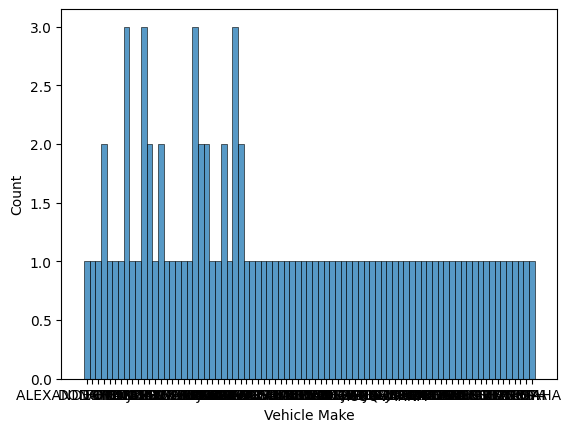

In [31]:
sns.histplot(data=groupeddf, x='Vehicle Make', multiple="dodge")

  Fuel Type  Vehicle Class  Vehicle Make  Vehicle Model  \
0    Diesel            715           715            715   
1  Electric            428           428            428   
2       LPG             93            93             93   
3    Petrol           3316          3316           3316   

   Cylinder Capacity Of Engine (c.c.)  Body Type  \
0                                 715        715   
1                                 428        428   
2                                  93         93   
3                                3316       3316   

   First Registration Vehicle Status  Permitted Gross Vehicle Weight   \
0                                715                              715   
1                                428                              428   
2                                 93                               93   
3                               3316                             3316   

   Number Of Passenger Seats   Taxable Value (HK$)  Year Of Manufacture  
0  

([0, 1, 2, 3],
 [Text(0, 0, 'Diesel'),
  Text(1, 0, 'Electric'),
  Text(2, 0, 'LPG'),
  Text(3, 0, 'Petrol')])

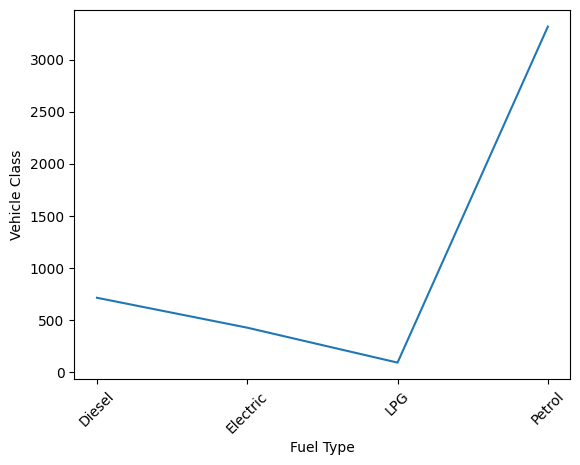

In [32]:
groupeddf2= df.groupby('Fuel Type').count().reset_index()
print(groupeddf2)
sns.lineplot(data=groupeddf2,x='Fuel Type',y='Vehicle Class')
plt.xticks(rotation=45)

<Axes: xlabel='Fuel Type', ylabel='Count'>

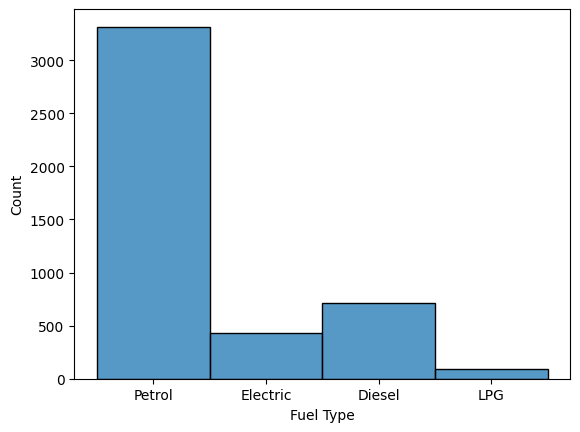

In [33]:
df = pd.read_csv('particulars_of_first_registered_vehicle_nov_2019_eng.csv')
#groupeddf2= df.groupby('Fuel Type')
sns.histplot(data=df, x='Fuel Type')

In [34]:
df = pd.read_csv('particulars_of_first_registered_vehicle_jul_2024_eng.csv')
groupeddf2= df.groupby('Fuel Type').count().reset_index()
#sns.histplot(data=df, x='Fuel Type')
df3 = groupeddf2[['Fuel Type','Vehicle Make']].copy()
df3.rename(columns={'Vehicle Make': 'Count'}, inplace=True)
df3['Date']='2024'

df3


,Fuel Type,Count,Date
0,Diesel,288,2024
1,Electric,1743,2024
2,LPG,89,2024
3,Petrol,1522,2024


In [35]:
# create an empty dataframe 
master_df  = pd.DataFrame() 

with open('filelistcsv.txt', 'r') as file:
    line = file.readline()
    while line:

        line = file.readline()
        #print(line, end='')  # Print each line
        if line.strip() == '':
            break
        filename = line.split()[4]
        #print(filename) # get the last part as filename
        monthdate = ''.join(filename.split('_')[5:7])
        #print(monthdate)
        df = pd.read_csv(filename)
        groupeddf2= df.groupby('Fuel Type').count().reset_index()
        #sns.histplot(data=df, x='Fuel Type')
        df3 = groupeddf2[['Fuel Type','Vehicle Make']].copy()
        df3.rename(columns={'Vehicle Make': 'Count'}, inplace=True)
        df3['Date']=monthdate
        master_df=pd.concat([master_df,df3])

master_df.index = pd.to_datetime(master_df['Date'],format = '%b%Y')
master_df.sort_index
print(master_df)





           Fuel Type  Count     Date
Date                                
2021-04-01    Diesel    614  apr2021
2021-04-01  Electric    629  apr2021
2021-04-01       LPG    118  apr2021
2021-04-01    Petrol   3300  apr2021
2022-04-01    Diesel    538  apr2022
...              ...    ...      ...
2022-09-01    Petrol   2301  sep2022
2023-09-01    Diesel    353  sep2023
2023-09-01  Electric   2288  sep2023
2023-09-01       LPG    112  sep2023
2023-09-01    Petrol   1533  sep2023

[229 rows x 3 columns]


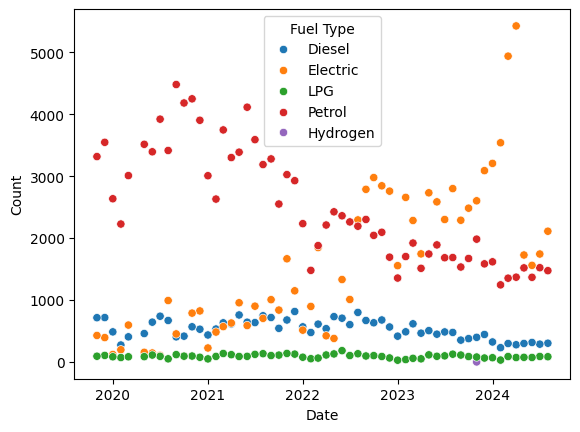

In [36]:
sns.scatterplot(data=master_df, x= master_df.index, y='Count', hue='Fuel Type')
plt.show()

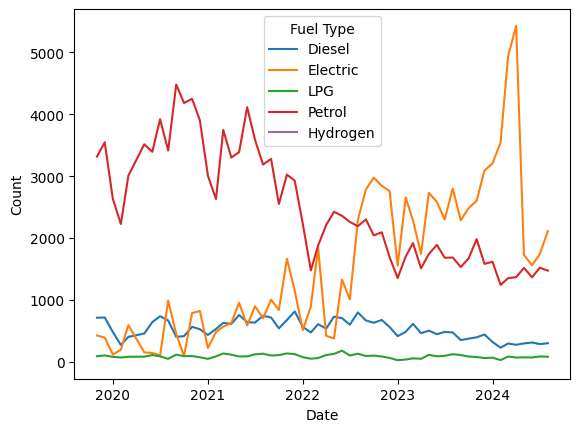

In [37]:
sns.lineplot(data=master_df, x= master_df.index, y='Count',hue = 'Fuel Type')
plt.show()

                               SARIMAX Results                                
Dep. Variable:                  Count   No. Observations:                   57
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -444.914
Date:                Wed, 16 Oct 2024   AIC                            901.827
Time:                        14:57:38   BIC                            913.979
Sample:                    11-30-2019   HQIC                           906.538
                         - 08-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2477      0.139     -1.788      0.074      -0.519       0.024
ar.L2         -0.3658      0.122     -2.990      0.003      -0.606      -0.126
ar.L3         -0.1680      0.190     -0.884      0.3

C:\Users\User\AppData\Local\Temp\ipykernel_21008\427911935.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_electric.drop(columns = ['Date', 'Fuel Type'],inplace =True)
C:\Users\User\AppData\Local\Temp\ipykernel_21008\427911935.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_electric.sort_index(inplace = True)


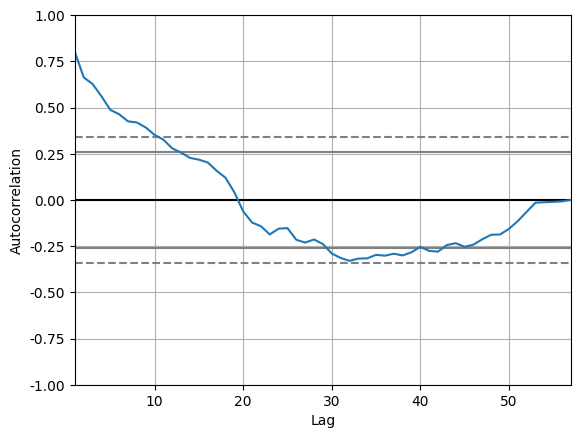

In [58]:
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
df_electric = master_df[master_df['Fuel Type']=='Electric']
df_electric.drop(columns = ['Date', 'Fuel Type'],inplace =True)
df_electric.index = pd.to_datetime( df_electric.index, format = '%Y-%m')
df_electric.index = df_electric.index.to_period('M')
df_electric.sort_index(inplace = True)
df_electric
autocorrelation_plot(df_electric)
model = ARIMA(df_electric, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())


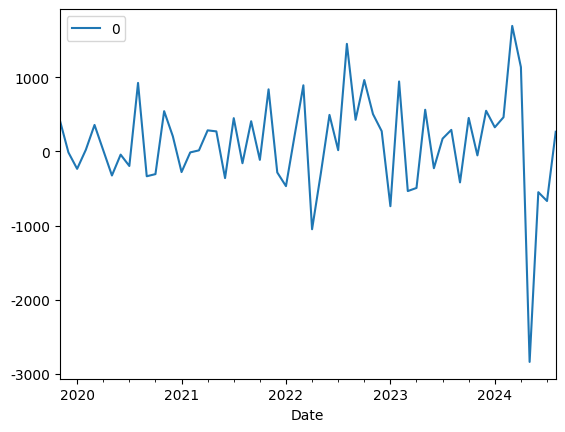

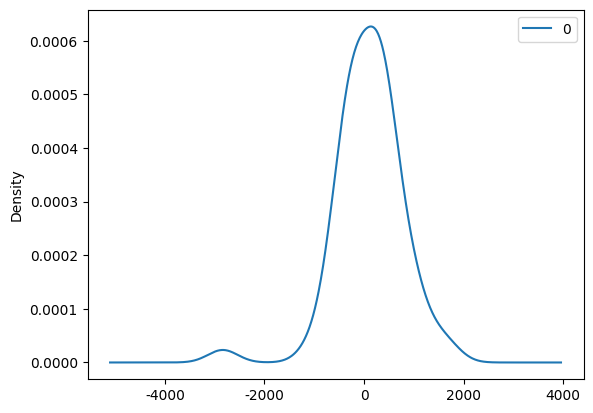

In [59]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()

In [60]:
print(residuals.describe())

                 0
count    57.000000
mean    103.016323
std     673.041668
min   -2837.243355
25%    -282.663058
50%     173.305269
75%     452.723447
max    1692.971555


In [61]:
X = df_electric.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

In [62]:
for t in range(len(test)):
 model = ARIMA(history, order=(5,1,0))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))

C:\Users\User\AppData\Local\Temp\ipykernel_21008\3163022022.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('predicted=%f, expected=%f' % (yhat, obs))


predicted=2778.368644, expected=1555.000000
predicted=1755.855300, expected=2657.000000
predicted=2541.737399, expected=2284.000000
predicted=2200.873821, expected=1745.000000
predicted=2093.579347, expected=2731.000000
predicted=2685.216934, expected=2585.000000
predicted=2112.615422, expected=2300.000000
predicted=2603.513958, expected=2799.000000
predicted=2724.973380, expected=2288.000000
predicted=2159.178810, expected=2483.000000
predicted=2621.086664, expected=2602.000000
predicted=2481.918956, expected=3089.000000
predicted=2790.508890, expected=3206.000000
predicted=3104.458596, expected=3539.000000
predicted=3362.218831, expected=4937.000000
predicted=4416.497517, expected=5425.000000
predicted=5182.136234, expected=1727.000000
predicted=2864.264197, expected=1560.000000
predicted=3015.008648, expected=1743.000000
predicted=1599.816749, expected=2111.000000


Test RMSE: 1075.039


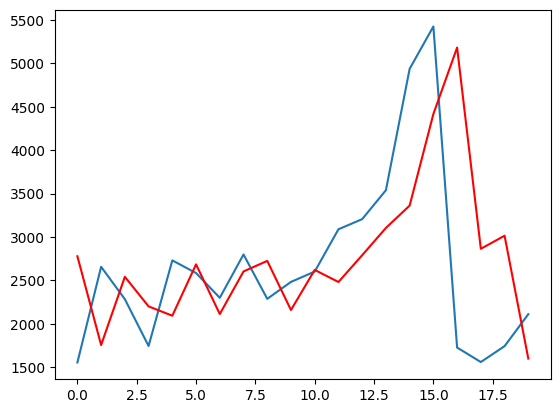

In [63]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [40]:
ffv= master_df.groupby(master_df['Date']).count()
ffv

,Fuel Type,Count
Date,,
apr2021,4,4
apr2022,4,4
apr2023,4,4
apr2024,4,4
aug2020,4,4
aug2021,4,4
aug2022,4,4
aug2023,4,4
aug2024,4,4


In [41]:
df_jp = pd.read_excel('EV_share_of_japan_market.xlsx')
df_jp.index = pd.to_datetime(df_jp['Date'],format = '%b%Y')
sns.lineplot(data=df_jp, x= df_jp.index, y='BEV Number of units')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'EV_share_of_japan_market.xlsx'

<Axes: xlabel='Date', ylabel='BEV Number of units'>

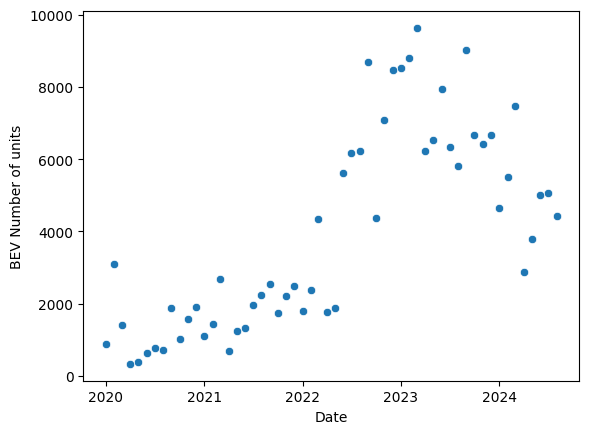

In [203]:
sns.scatterplot(data=df_jp, x= df_jp.index, y='BEV Number of units')